# Predicting City MPG Using Multiple Linear Regression

### Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Load Dataset

In [ ]:
df = pd.read_csv("/content/cars.csv")
df.shape

(5076, 18)

In [ ]:
df.head()

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
4,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5076 entries, 0 to 5075
Data columns (total 18 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Dimensions.Height                                5076 non-null   int64 
 1   Dimensions.Length                                5076 non-null   int64 
 2   Dimensions.Width                                 5076 non-null   int64 
 3   Engine Information.Driveline                     5076 non-null   object
 4   Engine Information.Engine Type                   5076 non-null   object
 5   Engine Information.Hybrid                        5076 non-null   bool  
 6   Engine Information.Number of Forward Gears       5076 non-null   int64 
 7   Engine Information.Transmission                  5076 non-null   object
 8   Fuel Information.City mpg                        5076 non-null   int64 
 9   Fuel Information.Fuel Type               

In [ ]:
df.describe()

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Number of Forward Gears,Fuel Information.City mpg,Fuel Information.Highway mpg,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
count,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000
mean,145.632191,127.825847,144.012411,5.519110,17.275808,24.125493,2010.867612,270.499409,272.707250
std,62.125026,77.358295,79.925899,0.845637,4.479485,6.488293,0.782951,95.293537,100.123328
min,1.000000,2.000000,1.000000,4.000000,8.000000,11.000000,2009.000000,100.000000,98.000000
25%,104.000000,60.000000,62.000000,5.000000,14.000000,20.000000,2010.000000,190.000000,187.000000
50%,152.000000,128.000000,158.000000,6.000000,17.000000,24.000000,2011.000000,266.000000,260.000000
75%,193.000000,198.000000,219.000000,6.000000,20.000000,28.000000,2011.000000,317.000000,335.000000
max,255.000000,255.000000,254.000000,8.000000,38.000000,223.000000,2012.000000,638.000000,774.000000


### Checking for Missing Values

In [ ]:
# Check for missing values
print("\nMissing Values in Dataset:")
print(df.isnull().sum())


Missing Values in Dataset:
Dimensions.Height                                  0
Dimensions.Length                                  0
Dimensions.Width                                   0
Engine Information.Driveline                       0
Engine Information.Engine Type                     0
Engine Information.Hybrid                          0
Engine Information.Number of Forward Gears         0
Engine Information.Transmission                    0
Fuel Information.City mpg                          0
Fuel Information.Fuel Type                         0
Fuel Information.Highway mpg                       0
Identification.Classification                      0
Identification.ID                                  0
Identification.Make                                0
Identification.Model Year                          0
Identification.Year                                0
Engine Information.Engine Statistics.Horsepower    0
Engine Information.Engine Statistics.Torque        0
dtype: int64


### Checking and handling Duplicate rows

In [ ]:
duplicate = df.duplicated().sum()
print(" Number of Duplicate Rows:",duplicate)

df.drop_duplicates(inplace=True)
print("New Dataset Shape:", df.shape)

 Number of Duplicate Rows: 18
New Dataset Shape: (5058, 18)


### Identify Categorical & Numerical Columns

In [ ]:
num_var = df.select_dtypes(include=["int64", "float64"]).columns
print("Numerical Columns:", num_var)

cat_var= df.select_dtypes(include=["object"]).columns
print("Categorical Columns:", cat_var)


Numerical Columns: Index(['Dimensions.Height', 'Dimensions.Length', 'Dimensions.Width',
       'Engine Information.Number of Forward Gears',
       'Fuel Information.City mpg', 'Fuel Information.Highway mpg',
       'Identification.Year',
       'Engine Information.Engine Statistics.Horsepower',
       'Engine Information.Engine Statistics.Torque'],
      dtype='object')
Categorical Columns: Index([], dtype='object')


### Encode Categorical Variables

In [ ]:
# Convert categorical columns to numeric using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

print("New Dataset Shape:", df.shape)

New Dataset Shape: (5058, 6553)


### Remove Outliers Using IQR Method

In [ ]:
#define a function to detect outliers using IQR
def detect_outliers(df):
  Q1=df.quantile(0.25)
  Q3=df.quantile(0.75)
  IQR=Q3-Q1
  return ((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).sum()
#detecting outliers
outlieres=detect_outliers(df[num_var])
print(outlieres)

Dimensions.Height                                    0
Dimensions.Length                                    0
Dimensions.Width                                     0
Engine Information.Number of Forward Gears          91
Fuel Information.City mpg                           36
Fuel Information.Highway mpg                        16
Identification.Year                                  0
Engine Information.Engine Statistics.Horsepower    124
Engine Information.Engine Statistics.Torque         36
dtype: int64


In [ ]:
#handling outliers using IQR method
for col in num_var:
# Iterate through each numerical column
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
data=df[(df[col]>=lower_bound) & (df[col]<=upper_bound)]
print("Data shape after handling outliers:",data.shape)

Data shape after handling outliers: (5022, 6553)


### Data Visualization

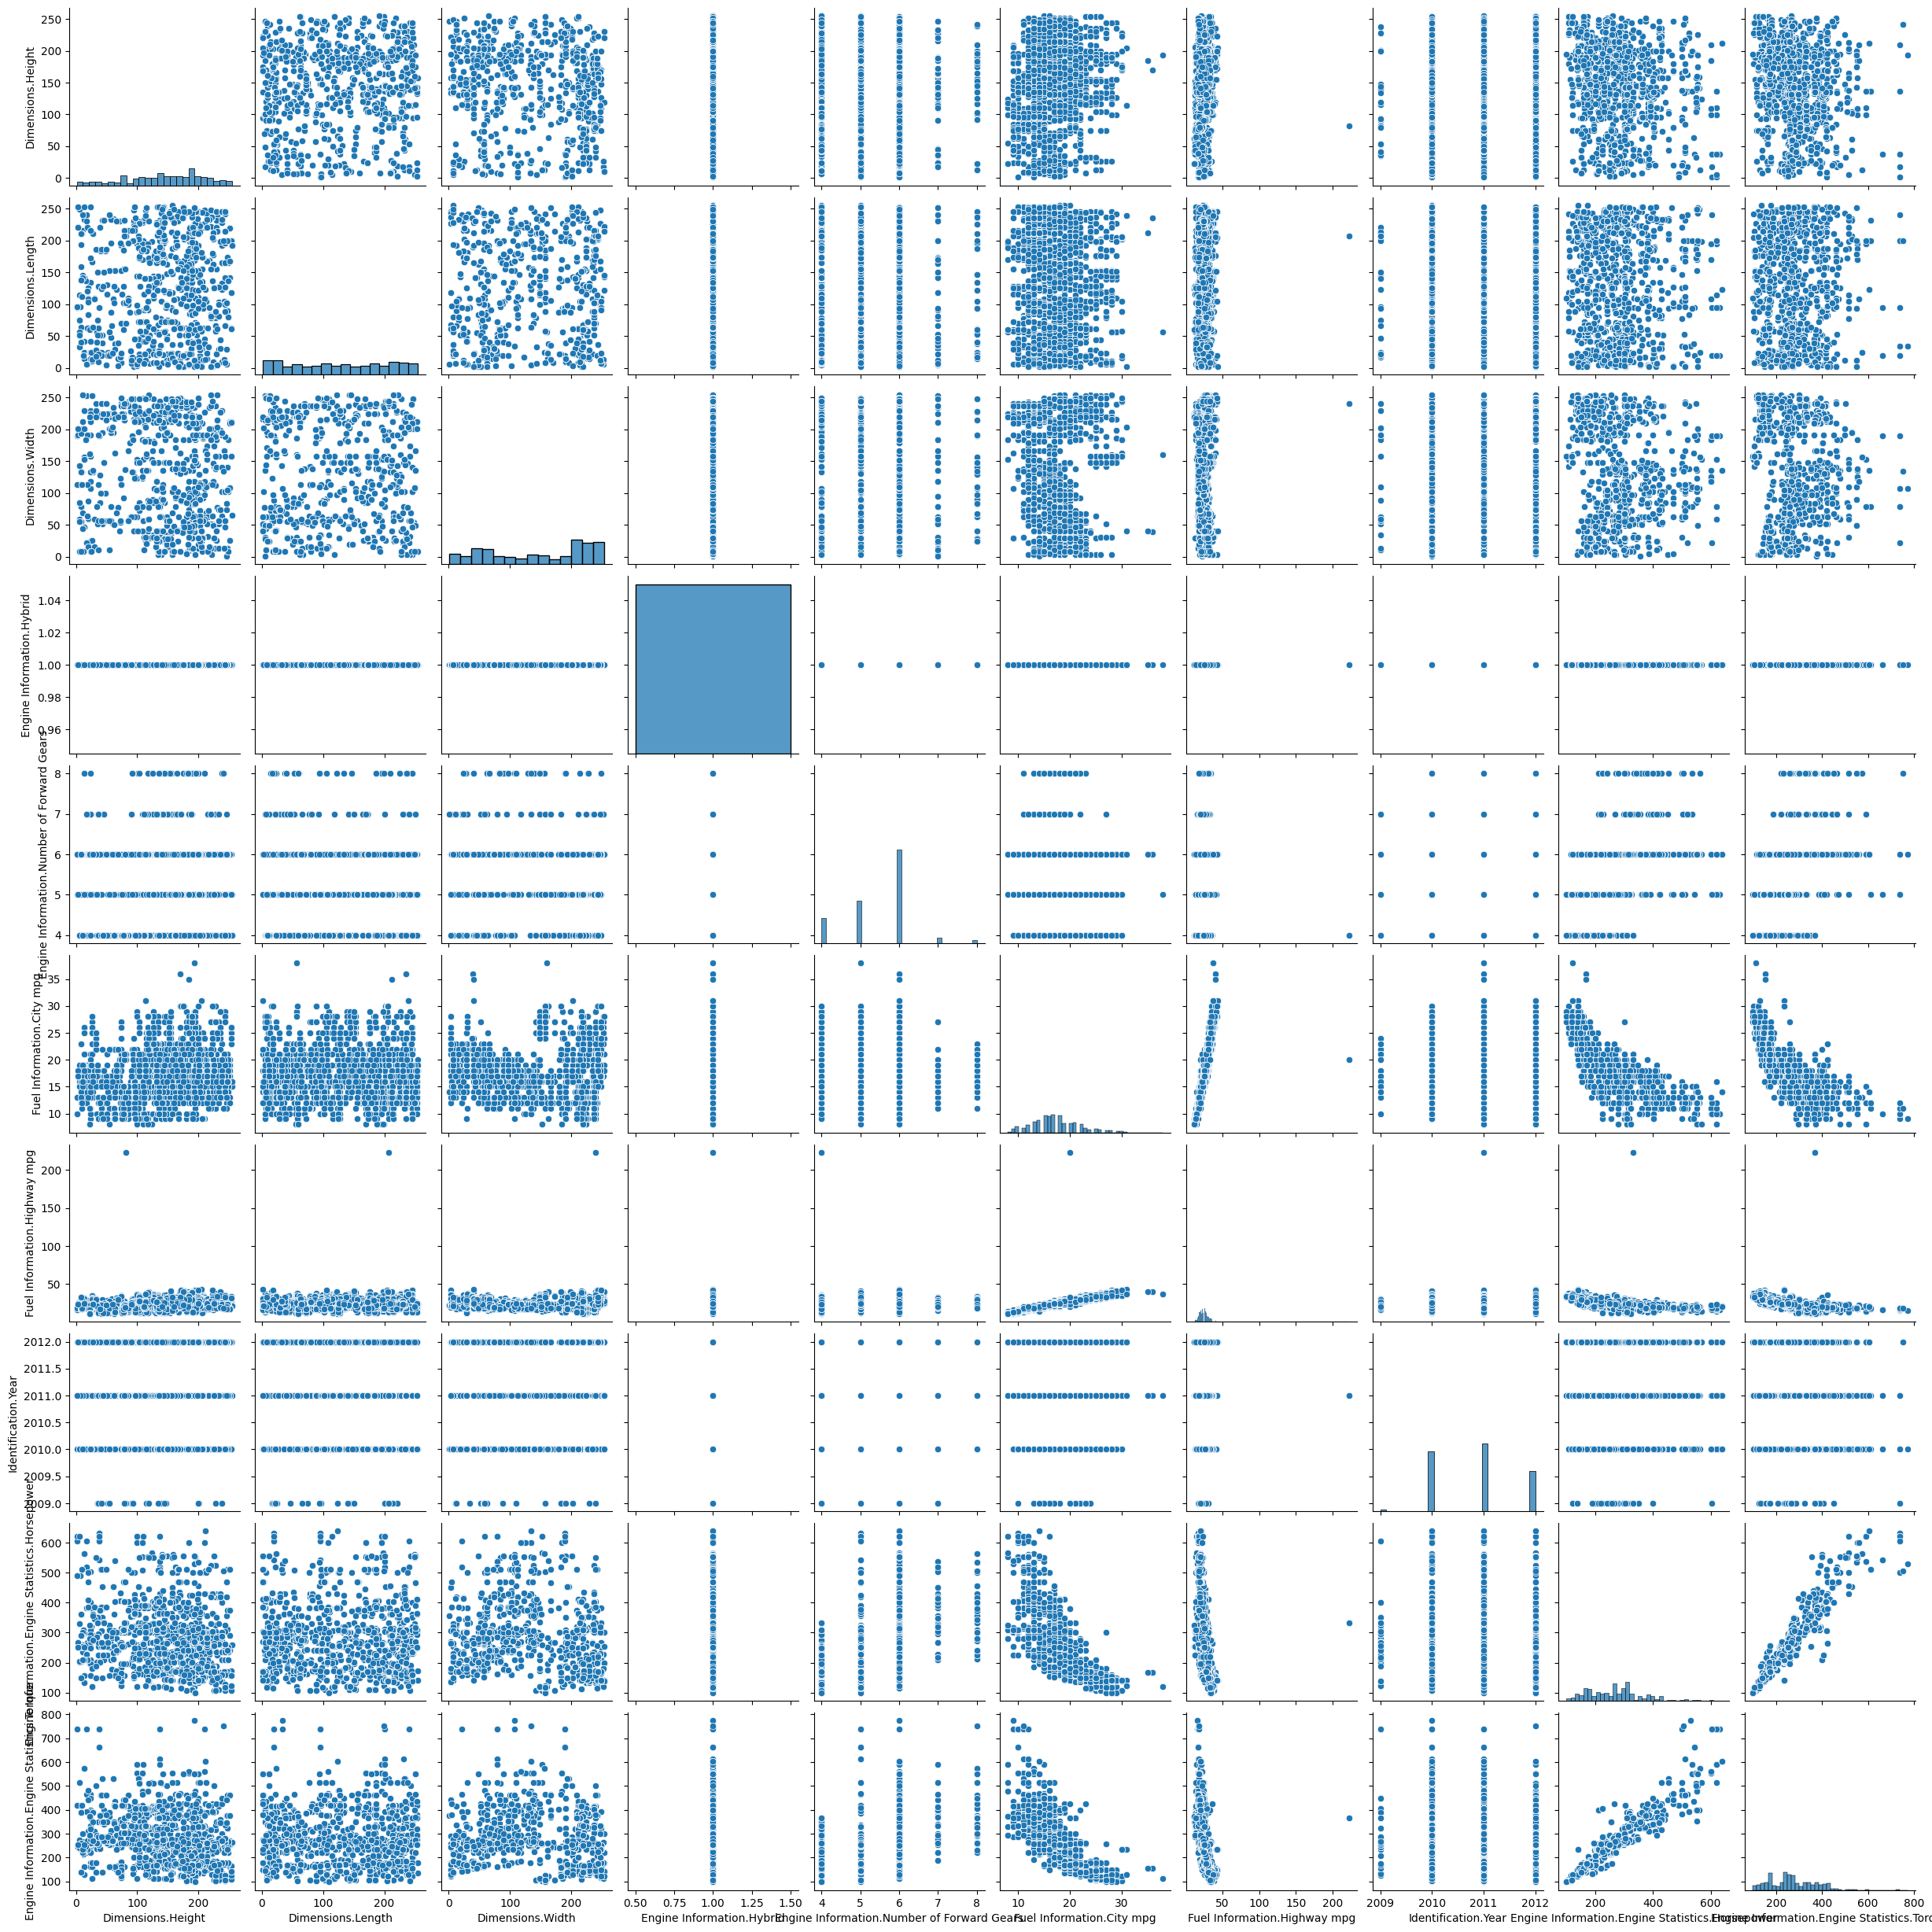

In [ ]:
# Pairplot for relationships
sns.pairplot(df)
plt.show()

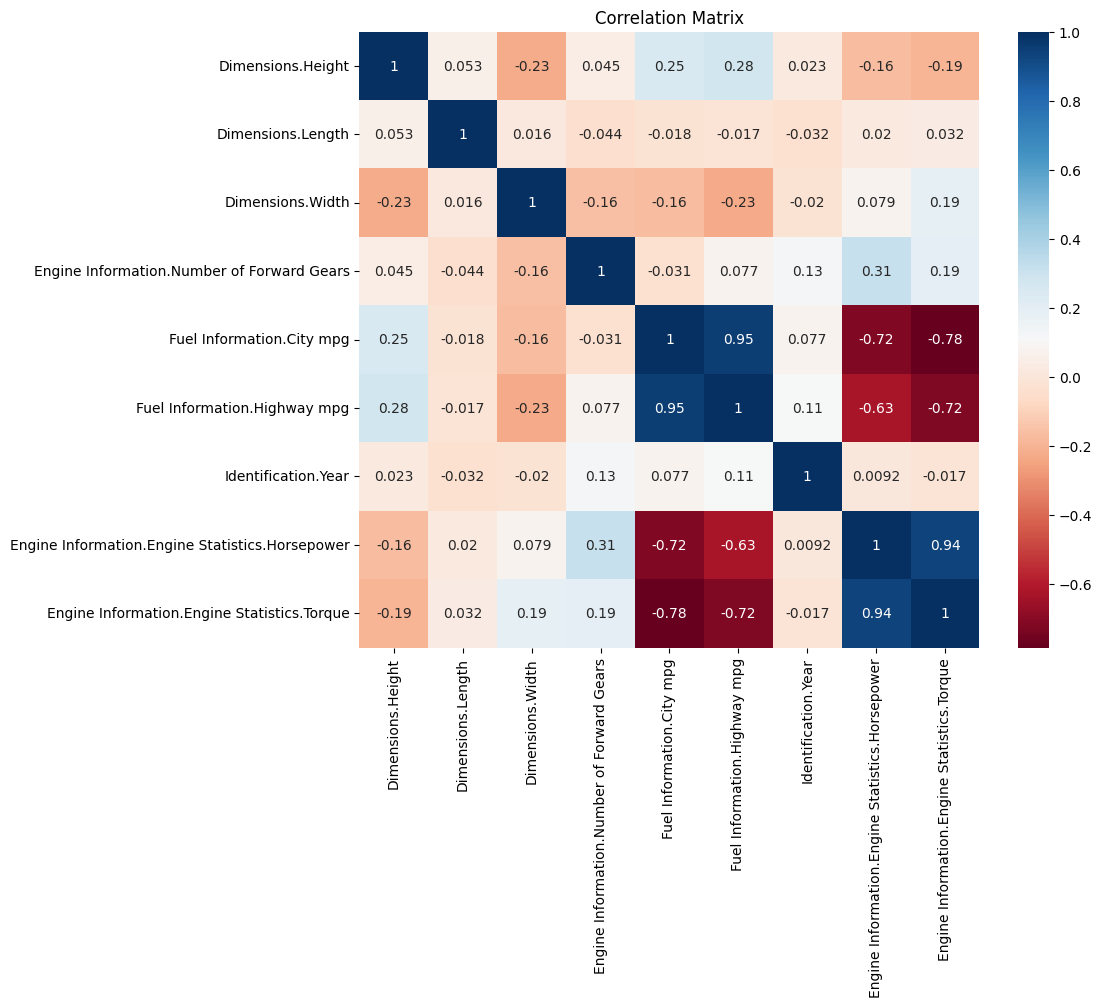

In [ ]:
# Heatmap to check correlations
plt.figure(figsize=(10,8))
corr_matrix=df[num_var].corr()
sns.heatmap(corr_matrix,annot=True,cmap="RdBu")
plt.title("Correlation Matrix")
plt.show()

### Feature Standardization

In [ ]:
scaler = StandardScaler()
numerical_variables = data_encoded.select_dtypes(include=['number']).columns

#feature scaling  on numerical features
data_encoded[numerical_variables] = scaler.fit_transform(data_encoded[numerical_variables])
data_encoded.head()


,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,-0.084567,0.194128,0.7067,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,0.685413,6 Speed Automatic Select Shift,0.160440,Gasoline,0.158659,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,-2.374541,-0.150875,-0.323421
1,-0.084567,0.194128,0.7067,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,0.685413,6 Speed Automatic Select Shift,1.082278,Gasoline,0.680628,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,-2.374541,-0.752606,-0.646499
2,-0.084567,0.194128,0.7067,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,0.685413,6 Speed Manual,0.851818,Gasoline,1.028607,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,-2.374541,-0.752606,-0.646499
3,-0.084567,0.194128,0.7067,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,0.685413,6 Speed Automatic Select Shift,0.851818,Gasoline,0.680628,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,-2.374541,-0.752606,-0.646499
4,-0.084567,0.194128,0.7067,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,0.685413,6 Speed Automatic Select Shift,0.851818,Gasoline,0.680628,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,-2.374541,-0.752606,-0.646499


### Define Independent (X) & Dependent (Y) Variables

In [ ]:
# Define target variable (y)
y = df["Fuel Information.City mpg"]

# Define independent variables (X)
X = df[[
    "Engine Information.Engine Statistics.Horsepower",
    "Engine Information.Engine Statistics.Torque",
    "Dimensions.Height",
    "Dimensions.Length",
    "Dimensions.Width",
    "Engine Information.Number of Forward Gears",
    "Fuel Information.Highway mpg",
    "Identification.Year"
]]


In [ ]:
#Standardize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

### Compute Variance Inflation Factor (VIF) to Remove Highly Correlated Features

In [ ]:
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled_df.values, i) for i in range(X_scaled_df.shape[1])]

print("Variance Inflation Factor:")
print(vif_data)

# Drop features with high VIF (threshold = 5)
high_vif_threshold = 5
high_vif_features = vif_data[vif_data["VIF"] > high_vif_threshold]["Feature"].tolist()

if high_vif_features:
    print("\nDropping features with high VIF:", high_vif_features)
    X = X.drop(columns=high_vif_features)


Variance Inflation Factor:
                                           Feature        VIF
0  Engine Information.Engine Statistics.Horsepower  10.210982
1      Engine Information.Engine Statistics.Torque  11.773780
2                                Dimensions.Height   1.124385
3                                Dimensions.Length   1.009065
4                                 Dimensions.Width   1.185476
5       Engine Information.Number of Forward Gears   1.334730
6                     Fuel Information.Highway mpg   2.464146
7                              Identification.Year   1.030627

Dropping features with high VIF: ['Engine Information.Engine Statistics.Horsepower', 'Engine Information.Engine Statistics.Torque']


### Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Train the Multiple Linear Regression Model

In [ ]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)
# Get coefficients & intercept
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: -0.0006389917609934178
Coefficients: [-0.00594373 -0.00513938  0.04401677 -0.09783184  0.97555884 -0.01597017]


### Make Predictions on Test Data

In [ ]:
y_pred = model.predict(X_test)

### Evaluate Model Performance

In [ ]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 0.20932354485771643
Mean Squared Error (MSE): 0.07644778174221317
Root Mean Squared Error (RMSE): 0.2764919198497728
R² Score: 0.9244155069036495


**regression equation**

In [ ]:
coefficients = model.coef_
intercept = model.intercept_

feature_names = X_train.columns

print("\nLinear Regression Equation:")
equation = "City mpg = {:.2f}".format(intercept)
for feature, coef in zip(feature_names, coefficients):
    equation += " + ({:.2f} * {})".format(coef, feature)
print(equation)



Linear Regression Equation:
City mpg = -0.00 + (-0.01 * Dimensions.Height) + (-0.01 * Dimensions.Length) + (0.04 * Dimensions.Width) + (-0.10 * Engine Information.Number of Forward Gears) + (0.98 * Fuel Information.Highway mpg) + (-0.02 * Identification.Year)


### Visualization of Actual vs. Predicted Values

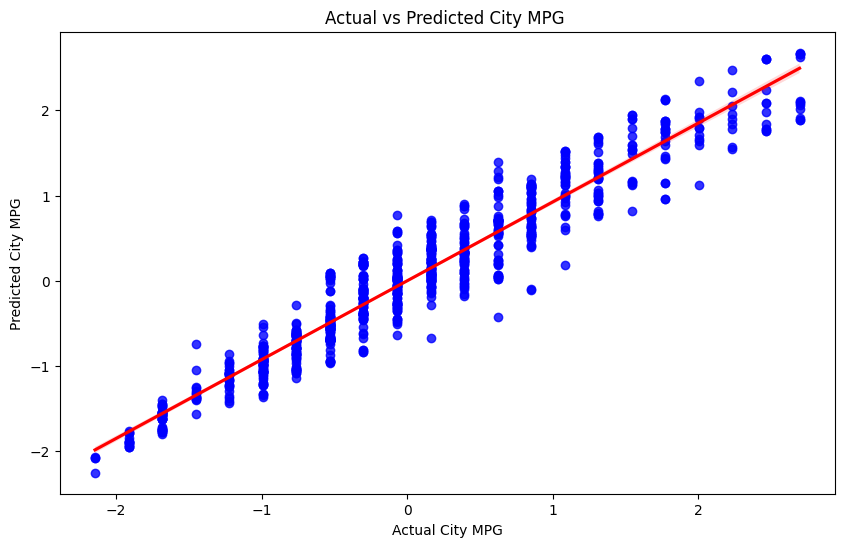

In [ ]:
# Plot Actual vs Predicted with Regression Line
plt.figure(figsize=(10,6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={"color": "blue"}, line_kws={"color": "red"})  # Blue scatter, red regression line
plt.xlabel("Actual City MPG")
plt.ylabel("Predicted City MPG")
plt.title("Actual vs Predicted City MPG ")
plt.show()


### Residual plot to check for homoscedasticity

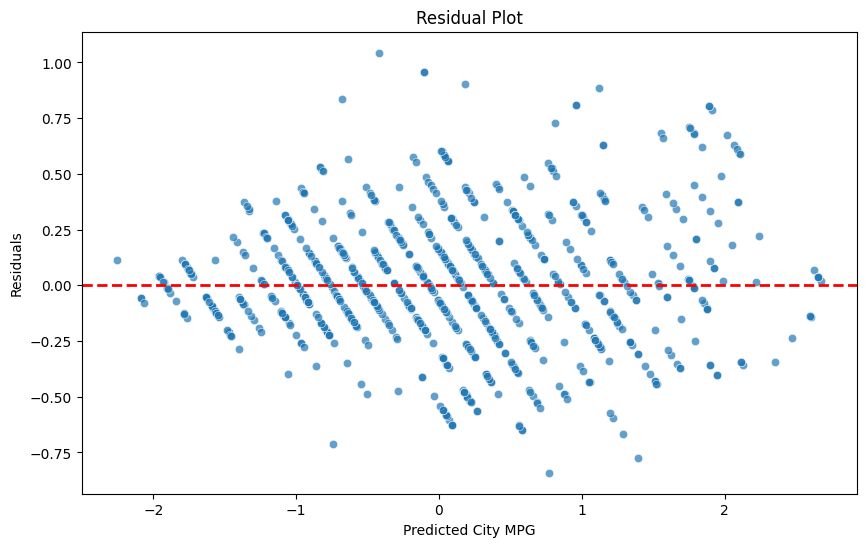

In [ ]:
# Calculate residuals
residuals = y_test - y_pred

# Plot Residuals
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='dashed', linewidth=2)
plt.xlabel("Predicted City MPG")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()
